In [1]:
#===创建的目录= 函数===#
def mkdir(path):
    import os      # 引入模块
    isExists=os.path.exists(path) # 判断路径是否存在 #存在True  #不存在 False
    if not isExists: # 判断结果
        os.makedirs(path) # 创建目录操作函数
        print (path +' 创建成功')
        return True
    else:  
        print (path+' 目录已存在')# 如果目录存在则不创建，并提示目录已存在
        return False
        
# 定义要创建的目录
Image_path = ["./Image_NPY/NPY_color_depth/", "./Image_NPY/NPY_Infrared/", "./Image_NPY/NPY_depthFill/", 
            "./Image_IMG/IMG_color_depth/", "./Image_IMG/IMG_Infrared/", "./Image_IMG/IMG_depthFill/"]   
# 调用函数
for path in Image_path:
    mkdir(path)

# 定义要创建的目录2
Image_path2 = ["./Image_NPY2/NPY_color_depth/", "./Image_NPY2/NPY_Infrared/", 
            "./Image_IMG2/IMG_color_depth/", "./Image_IMG2/IMG_Infrared/"]   
# 调用函数2
for path in Image_path2:
    mkdir(path)

./Image_NPY/NPY_color_depth/ 目录已存在
./Image_NPY/NPY_Infrared/ 目录已存在
./Image_NPY/NPY_depthFill/ 目录已存在
./Image_IMG/IMG_color_depth/ 目录已存在
./Image_IMG/IMG_Infrared/ 目录已存在
./Image_IMG/IMG_depthFill/ 目录已存在
./Image_NPY2/NPY_color_depth/ 创建成功
./Image_NPY2/NPY_Infrared/ 创建成功
./Image_IMG2/IMG_color_depth/ 创建成功
./Image_IMG2/IMG_Infrared/ 创建成功


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import time

./Image_NPY/NPY_depthFill/depthFill_000002.npy


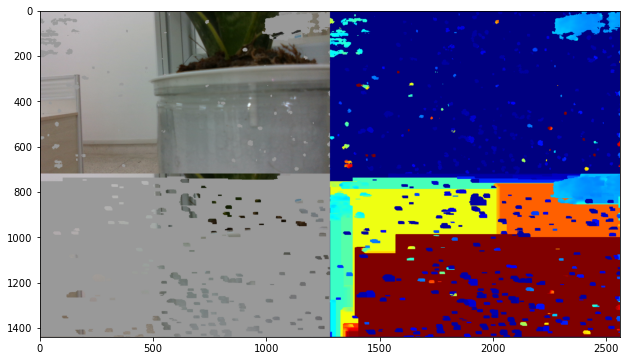

In [124]:
#===独立数据 = 处理环节===#    
depth_scale = 0.0010000000474974513 
clipping_distance_in_meters = 1       #1 meter
clipping_distance = clipping_distance_in_meters / depth_scale

Seq_num = 2
 
#图像路径
Image_path = ["./Image_NPY/NPY_color_depth/", "./Image_NPY/NPY_Infrared/", "./Image_NPY/NPY_depthFill/", 
            "./Image_IMG/IMG_color_depth/", "./Image_IMG/IMG_Infrared/", "./Image_IMG/IMG_depthFill/"]   

color_image_npy = np.load(file = Image_path[0] +'color_'+ str(Seq_num).zfill(6) +'.npy') 
deep_image_npy = np.load(file = Image_path[0] +'depth_'+ str(Seq_num).zfill(6) +'.npy') 
deep_image_npy_cMAP = cv2.applyColorMap(cv2.convertScaleAbs(deep_image_npy, alpha=0.03), cv2.COLORMAP_JET) 

deep_image_npy_3d = np.dstack((deep_image_npy, deep_image_npy, deep_image_npy)) 
gray_color = np.ones_like(color_image_npy) * 153 
backg_remove = np.where( (deep_image_npy_3d > clipping_distance) | (deep_image_npy_3d < 0) , gray_color , color_image_npy ) 

images = np.hstack((backg_remove, deep_image_npy_cMAP)) 

#深度图像fill
deepFill_image_npy = np.load(file = Image_path[2] +'depthFill_'+ str(Seq_num).zfill(6) +'.npy') 
print(Image_path[2] +'depthFill_'+ str(Seq_num).zfill(6) +'.npy')
deepFill_image_npy_cMAP = cv2.applyColorMap(cv2.convertScaleAbs(deepFill_image_npy, alpha=0.03), cv2.COLORMAP_JET) 

deepFill_image_npy_3d = np.dstack((deepFill_image_npy, deepFill_image_npy, deepFill_image_npy)) 
gray_color = np.ones_like(color_image_npy) * 153 
backg_remove = np.where( (deepFill_image_npy_3d > clipping_distance) | (deepFill_image_npy_3d < 0) , gray_color , color_image_npy ) 

images_Fill = np.hstack((backg_remove, deepFill_image_npy_cMAP)) 

images_T = np.vstack((images, images_Fill)) 

#显示图像
images_plt = cv2.cvtColor(images_T, cv2.COLOR_BGR2RGB) 
plt.rcParams['figure.figsize'] = [16, 6] 
plt.imshow(images_plt) 
